<h2>Notebook to preprocess LIAR2 dataset</h2>

In [ ]:
%pip install datasets
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install transformers
%pip install torch
%pip install nltk
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<h2>LIAR2 DATASET</h2>

Descripción del dataset

- ID: identificador único.

- Label: calificación de veracidad asignada por PolitiFact (seis niveles: Pants-on-Fire, False, Barely-True, Half-True, Mostly-True, True).

- Statement: texto completo de la afirmación.

- Subject: tema o categoría de la afirmación (p. ej., economía, salud, política).

- Speaker: persona que emite la afirmación.

- Speaker_job: cargo o puesto de trabajo del orador.

- State_info: estado de EE. UU. asociado al orador o al contexto de la afirmación.

- Barely_true_count, false_count, half_true_count, mostly_true_count, pants_on_fire_count: número de afirmaciones previas del mismo orador clasificadas en cada nivel de veracidad (hasta el momento de la nueva declaración).

- Context: información adicional sobre el entorno de la afirmación (lugar, evento, medio de comunicación, etc.)

- Date: fecha en la que se hizo la afirmación (formato YYYY-MM-DD).

- Justification: texto de la explicación o argumentación que el equipo de fact-checking aporta para motivar la calificación dada a la afirmación.

Carga del dataset LIAR2

In [2]:
from datasets import load_dataset

liar_dataset = load_dataset("chengxuphd/liar2")

e:\Master\TFM\FakeNewsReactApp\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Primer vistazo al conjunto de datos

In [3]:
print(liar_dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'label', 'statement', 'date', 'subject', 'speaker', 'speaker_description', 'state_info', 'true_counts', 'mostly_true_counts', 'half_true_counts', 'mostly_false_counts', 'false_counts', 'pants_on_fire_counts', 'context', 'justification'],
        num_rows: 18369
    })
    validation: Dataset({
        features: ['id', 'label', 'statement', 'date', 'subject', 'speaker', 'speaker_description', 'state_info', 'true_counts', 'mostly_true_counts', 'half_true_counts', 'mostly_false_counts', 'false_counts', 'pants_on_fire_counts', 'context', 'justification'],
        num_rows: 2297
    })
    test: Dataset({
        features: ['id', 'label', 'statement', 'date', 'subject', 'speaker', 'speaker_description', 'state_info', 'true_counts', 'mostly_true_counts', 'half_true_counts', 'mostly_false_counts', 'false_counts', 'pants_on_fire_counts', 'context', 'justification'],
        num_rows: 2296
    })
})


In [4]:
import pandas as pd

df = pd.concat([
    pd.DataFrame(liar_dataset["train"]),
    pd.DataFrame(liar_dataset["validation"]),
    pd.DataFrame(liar_dataset["test"])
], ignore_index=True)

print(f"Dataset LIAR2 cargado: {df.shape[0]} filas y {df.shape[1]} columnas")

df.head()

Dataset LIAR2 cargado: 22962 filas y 16 columnas


,id,label,statement,date,subject,speaker,speaker_description,state_info,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
0,13847,5,"90 percent of Americans ""support universal bac...","October 2, 2017",government regulation;polls and public opinion...,chris abele,"Chris Abele is Milwaukee County Executive, a p...",wisconsin,1,4,5,3,5,2,a tweet,"""Universal"" is the term for background checks ..."
1,13411,1,Last year was one of the deadliest years ever ...,"May 19, 2017",after the fact;congress;criminal justice;histo...,thom tillis,Thom Tillis is a Republican who serves as U.S....,north carolina,0,2,7,3,2,0,a press release supporting the Back The Blue A...,"Sen. Thom Tillis, a North Carolina Republican,..."
2,10882,0,"Bernie Sanders's plan is ""to raise your taxes ...","October 28, 2015",taxes,chris christie,"Chris Christie announced June 6, 2023 that he ...",national,21,20,27,11,17,8,"Boulder, Colo","Christie said that Sanders’s plan is ""to raise..."
3,20697,4,Voter ID is supported by an overwhelming major...,"December 8, 2021",voter id laws,lee zeldin,Lee Zeldin is a Republican representing New Yo...,new york,1,2,0,0,0,0,a Tweet,Zeldin claimed voter identification requiremen...
4,6095,2,"Says Barack Obama ""robbed Medicare (of) $716 b...","August 12, 2012",federal budget;history;medicare;retirement,mitt romney,Mitt Romney is a U.S. senator from Utah. He ra...,national,31,33,58,35,32,19,"an interview on ""60 Minutes""","Romney said, ""There's only one president that ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22962 entries, 0 to 22961
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    22962 non-null  int64 
 1   label                 22962 non-null  int64 
 2   statement             22962 non-null  object
 3   date                  22962 non-null  object
 4   subject               22755 non-null  object
 5   speaker               22962 non-null  object
 6   speaker_description   22952 non-null  object
 7   state_info            17321 non-null  object
 8   true_counts           22962 non-null  int64 
 9   mostly_true_counts    22962 non-null  int64 
 10  half_true_counts      22962 non-null  int64 
 11  mostly_false_counts   22962 non-null  int64 
 12  false_counts          22962 non-null  int64 
 13  pants_on_fire_counts  22962 non-null  int64 
 14  context               22808 non-null  object
 15  justification         22962 non-null

In [6]:
print("Nulos por columna:\n", df.isnull().sum())

Nulos por columna:
 id                         0
label                      0
statement                  0
date                       0
subject                  207
speaker                    0
speaker_description       10
state_info              5641
true_counts                0
mostly_true_counts         0
half_true_counts           0
mostly_false_counts        0
false_counts               0
pants_on_fire_counts       0
context                  154
justification              0
dtype: int64


<h3>Columna STATE_INFO</h3>

La variable state_info representa el estado de EE. UU. asociado al periodista o al contexto de la afirmación.

No es extrapolable a otros países de habla inglesa por lo que es una característica que no aporta mucho valor analítico.

Por otro lado tiene un 30 % de nulos por lo que los datos recogidos se podrían considerar muy inferiores respecto al resto de valores

Por todo esto se ha decidido eliminar la variable state_info del conjunto de datos

In [7]:
df = df.drop(columns=["state_info"])

df.head()

,id,label,statement,date,subject,speaker,speaker_description,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
0,13847,5,"90 percent of Americans ""support universal bac...","October 2, 2017",government regulation;polls and public opinion...,chris abele,"Chris Abele is Milwaukee County Executive, a p...",1,4,5,3,5,2,a tweet,"""Universal"" is the term for background checks ..."
1,13411,1,Last year was one of the deadliest years ever ...,"May 19, 2017",after the fact;congress;criminal justice;histo...,thom tillis,Thom Tillis is a Republican who serves as U.S....,0,2,7,3,2,0,a press release supporting the Back The Blue A...,"Sen. Thom Tillis, a North Carolina Republican,..."
2,10882,0,"Bernie Sanders's plan is ""to raise your taxes ...","October 28, 2015",taxes,chris christie,"Chris Christie announced June 6, 2023 that he ...",21,20,27,11,17,8,"Boulder, Colo","Christie said that Sanders’s plan is ""to raise..."
3,20697,4,Voter ID is supported by an overwhelming major...,"December 8, 2021",voter id laws,lee zeldin,Lee Zeldin is a Republican representing New Yo...,1,2,0,0,0,0,a Tweet,Zeldin claimed voter identification requiremen...
4,6095,2,"Says Barack Obama ""robbed Medicare (of) $716 b...","August 12, 2012",federal budget;history;medicare;retirement,mitt romney,Mitt Romney is a U.S. senator from Utah. He ra...,31,33,58,35,32,19,"an interview on ""60 Minutes""","Romney said, ""There's only one president that ..."


<h3>Columna SUBJECT</h3>

Visualizamos los valores nulos de la columna 'subject'

Los temas que se tratan en la noticia son cruciales para entender el contexto del texto, por lo que eliminarlos por completo podría ser problemático.

In [8]:
df.loc[df['subject'].isna()]

,id,label,statement,date,subject,speaker,speaker_description,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
99,5,4,"New Mexico moved ""up to"" sixth in the nation i...","May 10, 2007",None,bill richardson,Bill Richardson is the former governor of New ...,2,8,3,1,2,1,a TV Ad,"Richardson is correct, but doesn't mention the..."
513,19760,0,"The Biden White House has ""no one there. They ...","May 18, 2021",None,eric trump,Eric Trump is the second son of President Dona...,0,0,0,1,1,3,a Fox News appearance,"Eric Trump said of the Biden White House, ""The..."
692,17915,1,"Antifa ""are killing our police. Looting our bu...","June 22, 2020",None,dane eagle,Dane Eagle was elected to the Florida House of...,0,0,0,0,1,0,a social media ad,"Eagle said in a social media ad that antifa ""a..."
813,2116,3,"Seventy bills [Kendrick Meek] authored, not on...","August 10, 2010",None,jeff greene,"Jeff Greene, a wealthy businessman from Palm B...",0,1,3,4,1,0,a debate,While Meek may have not passed significant leg...
937,18066,1,"Says Gov. Gretchen Whitmer ""defunded the Michi...","July 22, 2020",None,great lakes news,Great Lakes News is a radio program broadcast ...,0,0,0,0,1,0,a tweet,A tweet from Great Lakes News said a Whitmer e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22448,2663,5,We haven't had control of the House for the la...,"October 18, 2010",None,william g. batchelder,William G. Batchelder is speaker of the Ohio H...,2,1,1,0,1,3,an interview,He mentioned passage of a two-year state budge...
22455,2585,2,"Of the states that have a lieutenant governor,...","October 18, 2010",None,robert healey,Robert Healey is a lawyer and businessman who ...,1,0,0,1,0,0,The Providence Journal,"Louisiana State Rep. Cameron Henry, whose bill..."
22529,3942,3,Sherrod Brown was just voted two years in a ro...,"June 24, 2011",None,josh mandel,"Josh Mandel, a Republican from Lyndhurst, is a...",5,5,3,5,6,7,a radio interview,"And both were careful to say that Brown was ""r..."
22691,23185,2,"Photo shows President Joe Biden sitting with ""...","June 19, 2023",None,donald trump,Donald Trump is the former president of the Un...,36,85,120,194,360,179,a Truth Social post,"""I think that in a Biden administration you’ll..."


Para no tener que eliminar datos y tampoco rellenarlos con valores que no aporten nada como podría ser un valor 'Unknown', se va a realizar una zero shot classification donde a partir de valores ya existentes en nuestra columna 'subject' obtendremos los valores que más se ajustan a los datos que no están completos.

Para ello en primer lugar vamos a cargar el modelo valhalla/distilbart-mnli-12-3, una versión destilada de bart-large-mnli creada utilizando la técnica No Teacher Distillation propuesta para el resumen de BART por Huggingface.

In [22]:
from transformers import pipeline

zero_shot_classif = pipeline("zero-shot-classification",
              model="valhalla/distilbart-mnli-12-3",
              device=0)

e:\Master\TFM\FakeNewsReactApp\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Usuario\.cache\huggingface\hub\models--valhalla--distilbart-mnli-12-3. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


Como lista de candidates que recibirá el modelo le pasaremos las 20 primeras columnas sin repetición.

In [60]:
value_counts_subject = df["subject"].value_counts().head(20)
print(value_counts_subject)

subject
facebook fact-checks                              940
health care                                       581
elections                                         482
taxes                                             474
education                                         414
facebook fact-checks;coronavirus                  406
immigration                                       370
candidate biography                               283
elections;facebook fact-checks                    256
fake news;punditfact                              246
economy;jobs                                      243
economy                                           237
public health;facebook fact-checks;coronavirus    235
fake news;facebook fact-checks                    218
guns                                              215
Unclassified                                      207
federal budget                                    165
state budget                                      163
jobs                

Obtenemos la lista de los 20 'subjects' mas repetidos, después nos quedamos con los temas que aparecen solos y comprobamos las apariciones de varios temas para gestionar que si existe alguno de esos temas que no esté añadido, se añada finalmente a la lista.

In [ ]:
top20_subjects = value_counts_subject.head(20).index.tolist()

mask = [t for t in top20_subjects if ';' not in t]
mask_set = set(mask)

additional = []
for t in top20_subjects:
    if ';' in t:
        for sub in t.split(';'):
            sub = sub.strip()
            if sub not in mask_set:
                additional.append(sub)

seen = set()
unique_additional = []
for item in additional:
    if item not in seen:
        unique_additional.append(item)
        seen.add(item)

final_topics = mask + unique_additional

print(final_topics)

['facebook fact-checks', 'health care', 'elections', 'taxes', 'education', 'immigration', 'candidate biography', 'economy', 'guns', 'Unclassified', 'federal budget', 'state budget', 'jobs', 'abortion', 'coronavirus', 'fake news', 'punditfact', 'public health']


Como previamente se había solucionado el problema con la creación de la categoría unclassified, los null realmente son 'Unclassified'

In [9]:
df["subject"].fillna("Unclassified", inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19208\11594537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["subject"].fillna("Unclassified", inplace=True)


In [10]:
df.loc[df['subject'] == 'Unclassified']

,id,label,statement,date,subject,speaker,speaker_description,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
99,5,4,"New Mexico moved ""up to"" sixth in the nation i...","May 10, 2007",Unclassified,bill richardson,Bill Richardson is the former governor of New ...,2,8,3,1,2,1,a TV Ad,"Richardson is correct, but doesn't mention the..."
513,19760,0,"The Biden White House has ""no one there. They ...","May 18, 2021",Unclassified,eric trump,Eric Trump is the second son of President Dona...,0,0,0,1,1,3,a Fox News appearance,"Eric Trump said of the Biden White House, ""The..."
692,17915,1,"Antifa ""are killing our police. Looting our bu...","June 22, 2020",Unclassified,dane eagle,Dane Eagle was elected to the Florida House of...,0,0,0,0,1,0,a social media ad,"Eagle said in a social media ad that antifa ""a..."
813,2116,3,"Seventy bills [Kendrick Meek] authored, not on...","August 10, 2010",Unclassified,jeff greene,"Jeff Greene, a wealthy businessman from Palm B...",0,1,3,4,1,0,a debate,While Meek may have not passed significant leg...
937,18066,1,"Says Gov. Gretchen Whitmer ""defunded the Michi...","July 22, 2020",Unclassified,great lakes news,Great Lakes News is a radio program broadcast ...,0,0,0,0,1,0,a tweet,A tweet from Great Lakes News said a Whitmer e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22448,2663,5,We haven't had control of the House for the la...,"October 18, 2010",Unclassified,william g. batchelder,William G. Batchelder is speaker of the Ohio H...,2,1,1,0,1,3,an interview,He mentioned passage of a two-year state budge...
22455,2585,2,"Of the states that have a lieutenant governor,...","October 18, 2010",Unclassified,robert healey,Robert Healey is a lawyer and businessman who ...,1,0,0,1,0,0,The Providence Journal,"Louisiana State Rep. Cameron Henry, whose bill..."
22529,3942,3,Sherrod Brown was just voted two years in a ro...,"June 24, 2011",Unclassified,josh mandel,"Josh Mandel, a Republican from Lyndhurst, is a...",5,5,3,5,6,7,a radio interview,"And both were careful to say that Brown was ""r..."
22691,23185,2,"Photo shows President Joe Biden sitting with ""...","June 19, 2023",Unclassified,donald trump,Donald Trump is the former president of the Un...,36,85,120,194,360,179,a Truth Social post,"""I think that in a Biden administration you’ll..."


Creamos una máscara para identificar los valores 'Unclassified' en nuestra columna subject y se realiza la llamada al modelo con el texto de la noticia, los posibles tópicos y la template que nos indicará de forma base que subject se ha escogido.

En nuestro caso escogeremos siempre la primera que nos devuelva ya que es la que mas probabilidad tenga de encajar correctamente.

In [66]:
unclassified_initial_list = []

for id in df.loc[df['subject'] == 'Unclassified']['id']:
    unclassified_initial_list.append(id)

In [68]:
template = "The subject is {}."

unknown_mask = df["subject"] == "Unclassified"

df.loc[unknown_mask, "subject"] = df.loc[unknown_mask, "statement"].apply(
    lambda txt: zero_shot_classif(txt, final_topics, hypothesis_template=template)["labels"][0]
)

In [ ]:
for value in unclassified_initial_list:
    print(df[df['id'] == value]['subject'])

print(f'Actualmente hay {df["subject"].isna().sum()} valores nulos en el campo subject')

print(f'Actualmente hay {len(df.loc[df["subject"].str.strip().eq("Unclassified")])} valores unclassified en el campo subject')

99    jobs
Name: subject, dtype: object
513    immigration
Name: subject, dtype: object
692    punditfact
Name: subject, dtype: object
813    guns
Name: subject, dtype: object
937    state budget
Name: subject, dtype: object
947    elections
Name: subject, dtype: object
1003    economy
Name: subject, dtype: object
1011    punditfact
Name: subject, dtype: object
1635    federal budget
Name: subject, dtype: object
1870    punditfact
Name: subject, dtype: object
2019    punditfact
Name: subject, dtype: object
2089    elections
Name: subject, dtype: object
2198    punditfact
Name: subject, dtype: object
2244    jobs
Name: subject, dtype: object
2315    punditfact
Name: subject, dtype: object
2507    economy
Name: subject, dtype: object
2603    health care
Name: subject, dtype: object
2671    economy
Name: subject, dtype: object
2693    elections
Name: subject, dtype: object
2743    punditfact
Name: subject, dtype: object
2907    economy
Name: subject, dtype: object
2920    health care
Name

Observamos que quedan 5 valores a Unclassified, por tanto en vez de statement, a estos se les aplicará justification para darle un contexto extra.

In [74]:
template = "The subject is {}."

unknown_mask = df["subject"] == "Unclassified"

df.loc[unknown_mask, "subject"] = df.loc[unknown_mask, "justification"].apply(
    lambda txt: zero_shot_classif(txt, final_topics, hypothesis_template=template)["labels"][0]
)

Finalmente ya podemos observar como todos los valores nulos o Unclassified se han eliminado por datos que nos han aportado tanto el titular de la noticia como la justificación en algunos casos

In [75]:
for value in unclassified_initial_list:
    print(df[df['id'] == value]['subject'])

print(f'Actualmente hay {df["subject"].isna().sum()} valores nulos en el campo subject')

print(f'Actualmente hay {len(df.loc[df["subject"].str.strip().eq("Unclassified")])} valores unclassified en el campo subject')

99    jobs
Name: subject, dtype: object
513    immigration
Name: subject, dtype: object
692    punditfact
Name: subject, dtype: object
813    guns
Name: subject, dtype: object
937    state budget
Name: subject, dtype: object
947    elections
Name: subject, dtype: object
1003    economy
Name: subject, dtype: object
1011    punditfact
Name: subject, dtype: object
1635    federal budget
Name: subject, dtype: object
1870    punditfact
Name: subject, dtype: object
2019    punditfact
Name: subject, dtype: object
2089    elections
Name: subject, dtype: object
2198    punditfact
Name: subject, dtype: object
2244    jobs
Name: subject, dtype: object
2315    punditfact
Name: subject, dtype: object
2507    economy
Name: subject, dtype: object
2603    health care
Name: subject, dtype: object
2671    economy
Name: subject, dtype: object
2693    elections
Name: subject, dtype: object
2743    punditfact
Name: subject, dtype: object
2907    economy
Name: subject, dtype: object
2920    health care
Name

<h3>Columna SPEAKER_DESCRIPTION</h3>

Visualizamos los valores nulos de la columna 'speaker_description'

In [11]:
df.loc[df['speaker_description'].isna()]

,id,label,statement,date,subject,speaker,speaker_description,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
2384,2139,0,President Obama is a Muslim.,"August 19, 2010",candidate biography;obama birth certificate;re...,18% of the american public,None,0,0,0,0,0,1,a Pew Research Center poll,A benign explanation is that there is genuine ...
2992,2239,3,"Clayton County has employed 1,300 people over ...","September 7, 2010",economy;housing,mickie williams,None,0,0,1,0,0,0,a presentation,"But, as Emrath and others said, it would be ea..."
3262,8964,2,"Even when all other state agencies took cuts, ...","June 4, 2014",education,republican party of georgia,None,0,0,1,2,1,0,press release,But it’s also important to know that while aus...
4525,2586,1,"State House incumbent Jill Chambers, R-Atlanta...","October 13, 2010",ethics,georgia house democratic caucus on behalf of e...,None,0,0,0,0,1,0,a campaign mailer,Parent's backers suggest Chambers is wasteful ...
6144,7927,2,When SACS came back to the DeKalb County Schoo...,"October 3, 2013",education,michael thurmond,None,1,0,0,1,0,0,a community meeting,But it also notes the significant work that is...
12476,7913,1,Rather than prioritize and pass ethics reform ...,"September 19, 2013",ethics,republican party of georgia,None,0,0,1,2,1,0,a press release,"Mahoney stood by the . ""When you do the math a..."
14214,2572,0,"Vows to keep Georgia's race for governor ""civi...","October 28, 2010",message machine 2010,roy barnes and nathan deal,None,0,0,0,0,0,1,statements to the press,"But it also leads to an uninformed electorate,..."
15260,2194,3,Georgia's U.S. senators voted for legislation ...,"August 17, 2010",environment;energy,stephen kretzmann,None,0,0,1,0,0,0,a website,Murkowski argued her resolution would not impa...
19616,2158,5,"Michael Thurmond ""authored major legislation t...","April 30, 2010",taxes,michael thurmond,None,1,0,0,1,0,0,his campaign website,The data comes from the department's annual st...
21640,2272,2,Barnes opposed the creation of the HOPE Schola...,"September 7, 2010",education,republican party of georgia,None,0,0,1,2,1,0,GOP press release,The lottery eventually became the funding mech...


Debido a que se tratan de 10 valores nulos y en algunos casos el speaker es el mismo, se van a buscar datos relacionados para completar esta información del dataset

In [12]:
descripciones = {
    "republican party of georgia": "The Republican Party of Georgia is a political party in Georgia active since 1978.",
    "18% of the american public": "People who have been surveyed",
    "mickie williams": "Affordable Housing Consultant and Developer at Georgia Housing Consultants",
    "michael thurmond": "Michael Thurmond is an American author, attorney, and Democrat politician.",
    "stephen kretzmann": "Stephen kretzmann is Executive Director/Founder at Oil Change International",
    "roy barnes and nathan deal": "Roy Barnes is the former governor of Georgia and Nathan Deal is running for Georgia governor in 2010.",
    "georgia house democratic caucus on behalf of elena parent": "Georgia Democratic Caucus on behalf of Senator Elena Parent"
}

# Asignar las descripciones usando .loc[]
for speaker, description in descripciones.items():
    df.loc[df['speaker'] == speaker, 'speaker_description'] = description

Comprobamos que ya no haya datos nulos y vamos a observar los datos cambiados en nuestro dataset

In [13]:
df.loc[df['speaker_description'].isna()]

,id,label,statement,date,subject,speaker,speaker_description,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification


In [14]:
speakers_modificados = [descripciones.keys()]

df.loc[df["speaker"].isin(speakers_modificados[0])]

,id,label,statement,date,subject,speaker,speaker_description,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
2384,2139,0,President Obama is a Muslim.,"August 19, 2010",candidate biography;obama birth certificate;re...,18% of the american public,People who have been surveyed,0,0,0,0,0,1,a Pew Research Center poll,A benign explanation is that there is genuine ...
2992,2239,3,"Clayton County has employed 1,300 people over ...","September 7, 2010",economy;housing,mickie williams,Affordable Housing Consultant and Developer at...,0,0,1,0,0,0,a presentation,"But, as Emrath and others said, it would be ea..."
3262,8964,2,"Even when all other state agencies took cuts, ...","June 4, 2014",education,republican party of georgia,The Republican Party of Georgia is a political...,0,0,1,2,1,0,press release,But it’s also important to know that while aus...
4525,2586,1,"State House incumbent Jill Chambers, R-Atlanta...","October 13, 2010",ethics,georgia house democratic caucus on behalf of e...,Georgia Democratic Caucus on behalf of Senator...,0,0,0,0,1,0,a campaign mailer,Parent's backers suggest Chambers is wasteful ...
6144,7927,2,When SACS came back to the DeKalb County Schoo...,"October 3, 2013",education,michael thurmond,"Michael Thurmond is an American author, attorn...",1,0,0,1,0,0,a community meeting,But it also notes the significant work that is...
12476,7913,1,Rather than prioritize and pass ethics reform ...,"September 19, 2013",ethics,republican party of georgia,The Republican Party of Georgia is a political...,0,0,1,2,1,0,a press release,"Mahoney stood by the . ""When you do the math a..."
14214,2572,0,"Vows to keep Georgia's race for governor ""civi...","October 28, 2010",message machine 2010,roy barnes and nathan deal,Roy Barnes is the former governor of Georgia a...,0,0,0,0,0,1,statements to the press,"But it also leads to an uninformed electorate,..."
15260,2194,3,Georgia's U.S. senators voted for legislation ...,"August 17, 2010",environment;energy,stephen kretzmann,Stephen kretzmann is Executive Director/Founde...,0,0,1,0,0,0,a website,Murkowski argued her resolution would not impa...
19616,2158,5,"Michael Thurmond ""authored major legislation t...","April 30, 2010",taxes,michael thurmond,"Michael Thurmond is an American author, attorn...",1,0,0,1,0,0,his campaign website,The data comes from the department's annual st...
21640,2272,2,Barnes opposed the creation of the HOPE Schola...,"September 7, 2010",education,republican party of georgia,The Republican Party of Georgia is a political...,0,0,1,2,1,0,GOP press release,The lottery eventually became the funding mech...


Visualizamos los valores nulos de la columna 'context'

In [15]:
df.loc[df['context'].isna() | df["context"].str.strip().eq("")]

,id,label,statement,date,subject,speaker,speaker_description,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
137,112,3,"First, he said he would take all of our troops...","October 12, 2007",iraq,joe biden,Joe Biden is the president of the United State...,25,64,65,52,55,7,None,"In a Richardson campaign video, a narrator say..."
204,255,0,"The Mormon religion has ""a plan that will see ...","December 22, 2007",religion,freedom defense advocates,Freedom Defense Advocates is a political actio...,0,0,0,0,0,1,None,There is absolutely no place for these attacks...
334,15263,0,Man dug tunnel from home to the pub and drank ...,"October 7, 2017",fake news;facebook fact-checks,bloggers,Blog posting on the Internet,8,18,24,53,233,396,None,"""We messed up,"" the addendum says. ""The story ..."
539,14432,4,Homelessness has skyrocketed across California...,"March 8, 2018",homeless;housing;states;the 2018 california go...,travis allen,Travis Allen is a Republican and a member of t...,0,2,0,3,2,1,None,Candidate for governor and state lawmaker Trav...
614,14379,1,Singer Miley Cyrus: 'Trump fans are destroying...,"March 8, 2018",fake news;punditfact,bloggers,Blog posting on the Internet,8,18,24,53,233,396,None,A news story said that Miley Cyrus is blaming...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22416,73,5,Obama Skips Out On Condemning Left-Wing Attack...,"September 21, 2007",iraq,republican national committee,The Republican National Committee is the natio...,4,5,12,9,8,2,None,The resolution was offered by Sen. John Cornyn...
22576,9890,4,Assault weapons and handguns are allowed in th...,"January 19, 2015",guns,virginia house democratic caucus,The House Democratic Caucus consists of the 32...,0,1,0,0,1,0,None,"Calling for reform to Virginia’s gun laws, Hou..."
22777,15374,2,"Liberal Democrats"" who back Dan McCready ""cut ...","November 22, 2018",health care,mark harris,Rev. Mark Harris is the former pastor of First...,0,0,1,1,3,0,None,"However, his use of the number also gives a i..."
22866,13218,1,"Says North Carolina's replacement for HB2 ""ord...","March 31, 2017",civil rights;government regulation;lgbtq;sexua...,caitlyn jenner,"Caitlyn Jenner is a reality TV star, former Ol...",0,0,0,0,1,0,None,"After North Carolina replaced HB2, pro-LGBT ac..."


Para rellenar el conjunto de datos creamos una serie de reglas manuales basadas en la justificación de la noticia que nos permitirá inferir el contexto de la noticia.

In [16]:
import re

CONTEXT_PATTERNS = {
    "social media": [
        r"\btweet\b", r"\btwitter\b", r"\bfacebook\b", r"\bpost\b",
        r"\bsocial media\b", r"\binstagram\b", r"\blinkedin\b"
    ],
    "speech": [
        r"\bspeech\b", r"\baddress\b", r"\bremarks\b", r"\bstatement\b", r"\bspoken\b"
    ],
    "press release": [
        r"\bpress release\b", r"\bpress conference\b", r"\brelease\b"
    ],
    "interview": [
        r"\binterview\b", r"\binterviewed\b", r"\bq&a\b"
    ],
    "news article": [
        r"\barticle\b", r"\breport\b", r"\bnews\b", r"\bpublished in\b"
    ],
    "campaign": [
        r"\bcampaign video\b", r"\bcampaign\b", r"\bcampaign ad\b"
    ],
    "tv": [
        r"\btv\b", r"\btelevision\b", r"\btv show\b"
    ],
    "research article": [
        r"\bstudy\b", r"\bstudy published\b", r"\bresearch\b", 
        r"\bsurvey\b", r"\bpoll\b", r"\bcensus\b", r"\bdata\b"
    ],
    "advertisement": [
        r"\bflier\b", r"\bflyer\b", r"\bmail(er)?\b", r"\bchain email\b",
        r"\bnewsletter\b", r"\badvertisement\b", r"\bad\b"
    ],
    "fact-check": [
        r"\bfact[- ]check\b", r"\bpoliti?fact\b", r"\bsharethefacts\b",
        r"\bfactuality\b"
    ],
    "magazine article": [
        r"\bmagazine\b", r"\bwaiths digest\b", r"\breaders digest\b"
    ]
}

COMPILED_PATTERNS = [
    (re.compile("|".join(patterns), re.IGNORECASE), label)
    for label, patterns in CONTEXT_PATTERNS.items()
]

def infer_context(text):
    if not isinstance(text, str) or not text.strip():
        return "unknown"
    for regex, label in COMPILED_PATTERNS:
        if regex.search(text):
            return label
    return "unknown"

In [17]:
mask = df["context"].isna() | df["context"].str.strip().eq("unknown")

df.loc[mask, "context"] = df.loc[mask, "justification"].apply(infer_context)

In [18]:
print(f'Actualmente hay {df["context"].isna().sum()} valores nulos en el campo contexto')

print(f'Actualmente hay {len(df.loc[df["context"].str.strip().eq("unknown")])} valores unknown en el campo contexto')

Actualmente hay 0 valores nulos en el campo contexto
Actualmente hay 28 valores unknown en el campo contexto


In [38]:
df.loc[df['context'] == 'unknown']['id']

unknown_initial_list = []

for id in df.loc[df['context'] == 'unknown']['id']:
    unknown_initial_list.append(id)

for statement in df.loc[df['context'] == 'unknown']['justification']:
    print(statement+"\n")

Kucinich advocates a prompt withdrawal of U.S. troops to be replaced with international peace keepers. Biden, on the other hand, has proposed an elaborate plan for partitioning Iraq into self-governing regions with U.S. troops helping maintain order. We won't take any points off for Richardson's  to be among the "major" candidates here, but we will lower his -O-Meter rating because the other candidates have not said they want troops in Iraq indefinitely, as Richardson suggests. Instead, they have said they need the information a commander-in-chief gets to make a final decision on force levels in Iraq. It may be a fine distinction, but it's not the same thing as supporting an indefinite deployment.

Williams said Obama policies caused gas prices to rise from $1.89 in 2009 to $3.51 today. He’s got the prices correct, but experts say presidents don’t generally have the ability to make them rise or fall and didn’t see that reversing Alaska, Gulf or Keystone policies would have necessarily 

Para terminar de procesar estos datos y no dejar algunos con valor desconocido vamos a realizar una zero-shot context classification en la que utilizaremos un modelo de NLI ya entrenado para asignar algunas de nuestras etiquetas de contexto ya existentes a los datos desconocidos a partir de la justificación

In [39]:
cands = list(CONTEXT_PATTERNS.keys())
template = "This text is from a {}."

unknown_mask = df["context"] == "unknown"

df.loc[unknown_mask, "context"] = df.loc[unknown_mask, "justification"].apply(
    lambda txt: zero_shot_classif(txt, cands, hypothesis_template=template)["labels"][0]
)

In [48]:
for value in unknown_initial_list:
    print(df[df['id'] == value]['context'])

print(f'Actualmente hay {df["context"].isna().sum()} valores nulos en el campo contexto')

print(f'Actualmente hay {len(df.loc[df["context"].str.strip().eq("unknown")])} valores unknown en el campo contexto')

1933    campaign
Name: context, dtype: object
4742    speech
Name: context, dtype: object
4851    campaign
Name: context, dtype: object
6064    speech
Name: context, dtype: object
7638    fact-check
Name: context, dtype: object
7695    speech
Name: context, dtype: object
8608    fact-check
Name: context, dtype: object
8741    campaign
Name: context, dtype: object
9915    campaign
Name: context, dtype: object
10949    campaign
Name: context, dtype: object
12229    speech
Name: context, dtype: object
12708    fact-check
Name: context, dtype: object
13636    fact-check
Name: context, dtype: object
14208    speech
Name: context, dtype: object
14625    campaign
Name: context, dtype: object
15576    interview
Name: context, dtype: object
16596    speech
Name: context, dtype: object
17201    fact-check
Name: context, dtype: object
17496    speech
Name: context, dtype: object
18442    fact-check
Name: context, dtype: object
19395    speech
Name: context, dtype: object
19609    fact-check
Name:

<h3>Una vez limpiadas las columnas de datos nulos, guardamos el dataset para posteriormente seguir trabajando con el</h3>

Este conjunto de datos sin valores nulos será el punto de partida para cada uno de los pipelines de preprocesamiento de datos independientemente de si se trata de transformers o de los enfoques más clásicos

In [77]:
print("Nulos por columna:\n", df.isnull().sum())

Nulos por columna:
 id                      0
label                   0
statement               0
date                    0
subject                 0
speaker                 0
speaker_description     0
true_counts             0
mostly_true_counts      0
half_true_counts        0
mostly_false_counts     0
false_counts            0
pants_on_fire_counts    0
context                 0
justification           0
dtype: int64


In [78]:
df.to_csv('liar2_no_null_data.csv',index=False)

<h3>Volvemos a cargar el conjunto de datos que guardamos previamente, así ya no necesitaremos realizar de nuevo las operaciones de limpieza de columnas nulas sobre los datos</h3>

In [116]:
import pandas as pd

df_liar = pd.read_csv("liar2_no_null_data.csv")

In [26]:
df_liar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22962 entries, 0 to 22961
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    22962 non-null  int64 
 1   label                 22962 non-null  int64 
 2   statement             22962 non-null  object
 3   date                  22962 non-null  object
 4   subject               22962 non-null  object
 5   speaker               22962 non-null  object
 6   speaker_description   22962 non-null  object
 7   true_counts           22962 non-null  int64 
 8   mostly_true_counts    22962 non-null  int64 
 9   half_true_counts      22962 non-null  int64 
 10  mostly_false_counts   22962 non-null  int64 
 11  false_counts          22962 non-null  int64 
 12  pants_on_fire_counts  22962 non-null  int64 
 13  context               22962 non-null  object
 14  justification         22962 non-null  object
dtypes: int64(8), object(7)
memory usage:

<h2>Visualización de LIAR2</h2>

<h3>Columna label - Variable objetivo</h3>

Es muy importante conocer la distribución de la variable objetivo para diseñar estrategias de modelado adecuadas, garantizar un buen entrenamiento y obtener métricas fiables.

Con la visualización de la variable objetivo podremos detectar posibles desbalanceos en nuestro conjunto de datos que nos permitirá suplir estos problemas a la hora de crear los modelos y de entrenarlos.

En nuestro caso , para visualizar los datos no vamos a tratar directamente con los valores numéricos de las etiquetas si no también con las etiquetas de texto que los representan.

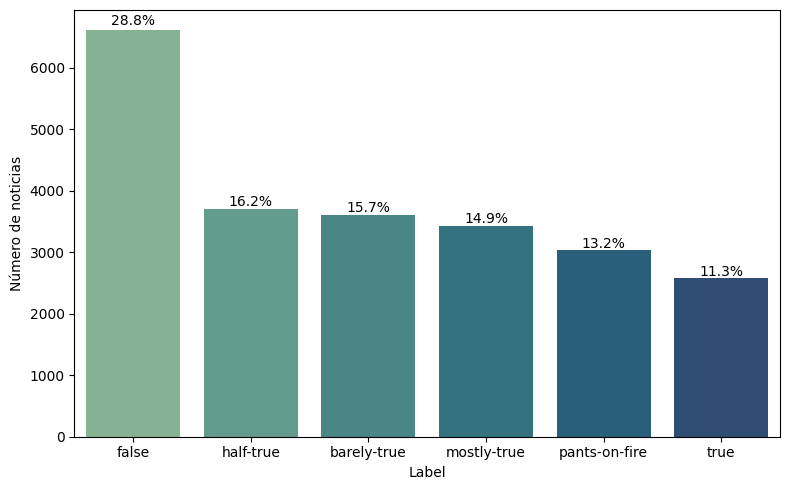

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

df_test = df_liar.copy()

label_map = {
    0: 'pants-on-fire',
    1: 'false',
    2: 'barely-true',
    3: 'half-true',
    4: 'mostly-true',
    5: 'true'
}

df_test['label_name'] = df_test['label'].map(label_map)

counts = df_test['label_name'].value_counts()
percentages = counts / counts.sum() * 100

data = pd.DataFrame({
    'label_name': counts.index,
    'counts': counts.values,
    'percentage': percentages.values
})

plt.figure(figsize=(8, 5))
sns.barplot(x='label_name', y='counts', hue='label_name', data=data, palette="crest", legend=False)

for idx, row in data.iterrows():
    plt.text(
        x=idx,
        y=row['counts'] + row['counts'] * 0.012,
        s=f"{row['percentage']:.1f}%",
        ha='center'
    )

plt.xlabel('Label')
plt.ylabel('Número de noticias')
plt.tight_layout()
plt.show()


En general podemos observar que los datos de todas las etiquetas están bastantes balanceados a excepción de la etiqueta 1 (False), por lo que antes de realizar el entrenamiento de cualquier modelo se revisará el balanceo de las clases haciendo que el entrenamiento trabaje con los porcentajes en cada clase más parecidos posibles.

<h3>Columna date - Fecha de la noticia</h3>

Esta conversión de los datos también forma parte del preprocesamiento, pero para graficar en función de la fecha lo hace mucho más sencillo

In [28]:
df_test['date'] = pd.to_datetime(df_test.get('date', ''), format='%B %d, %Y', errors='coerce')
df_test['year'] = df_test['date'].dt.year.astype(int)
df_test['month'] = df_test['date'].dt.month.astype(int)
df_test['day'] = df_test['date'].dt.day.astype(int)
df_test['dayofweek'] = df_test['date'].dt.dayofweek.astype(int)

df_test.info()

df_test.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22962 entries, 0 to 22961
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    22962 non-null  int64         
 1   label                 22962 non-null  int64         
 2   statement             22962 non-null  object        
 3   date                  22962 non-null  datetime64[ns]
 4   subject               22962 non-null  object        
 5   speaker               22962 non-null  object        
 6   speaker_description   22962 non-null  object        
 7   true_counts           22962 non-null  int64         
 8   mostly_true_counts    22962 non-null  int64         
 9   half_true_counts      22962 non-null  int64         
 10  mostly_false_counts   22962 non-null  int64         
 11  false_counts          22962 non-null  int64         
 12  pants_on_fire_counts  22962 non-null  int64         
 13  context         

,id,label,statement,date,subject,speaker,speaker_description,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification,label_name,year,month,day,dayofweek
0,13847,5,"90 percent of Americans ""support universal bac...",2017-10-02,government regulation;polls and public opinion...,chris abele,"Chris Abele is Milwaukee County Executive, a p...",1,4,5,3,5,2,a tweet,"""Universal"" is the term for background checks ...",true,2017,10,2,0


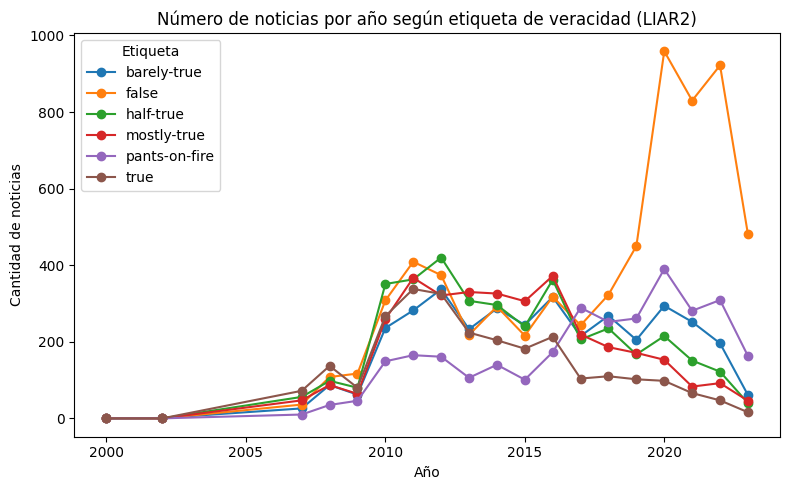

In [29]:
counts = df_test.groupby(['year', 'label_name']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 5))
for label in counts.columns:
    plt.plot(counts.index, counts[label], marker='o', label=label)

plt.title('Número de noticias por año según etiqueta de veracidad (LIAR2)')
plt.xlabel('Año')
plt.ylabel('Cantidad de noticias')
plt.legend(title='Etiqueta')
plt.tight_layout()
plt.show()

Con este gráfico podemos observar también lo que se confirmaba con la distribución de las etiquetas de veracidad en el conjunto de datos y es que existen muchas más noticias etiquetadas como falsas que el resto de etiquetas en nuestra variable objetivo.

- Drástico desequilibrio temporal: el modelo entrenado con datos 2017–2022 verá un exceso de ejemplos “false”, así que conviene estratificar las particiones por año y etiqueta o, al menos, hacer muestreo balanceado por año.

- Posible “drift” cronológico: las distribuciones de veracidad cambian a lo largo del tiempo, por lo que evaluar únicamente con un split aleatorio podría sobreestimar la capacidad predictiva en años recientes. Sería sensato probar un TimeSeriesSplit (entrenar en años anteriores y validar en posteriores) para medir robustez temporal.

- Ajuste de class weights: dada la explosión de “false”, utilizar class_weight='balanced' o re-muestrear en el conjunto de entrenamiento ayudará a que las clases minoritarias (“true”, “pants-on-fire”) conserven visibilidad.

<h3>Columna statement - Titular de la noticia</h3>

Vamos a buscar valores outliers en los titulares de la noticia, para ello en primer lugar vamos a preprocesar el texto para tener en cuenta que se haya aplicado tokenización, stop words, lematización y una limpieza básica del texto

In [30]:
import preprocess_data_legacy_pipeline

df_test = preprocess_data_legacy_pipeline.prepare_text_classic(df_test, ['statement'])

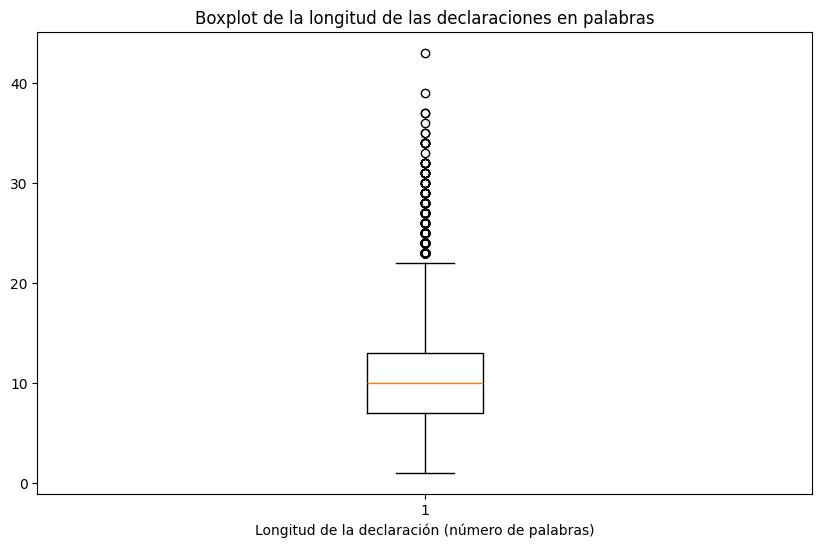

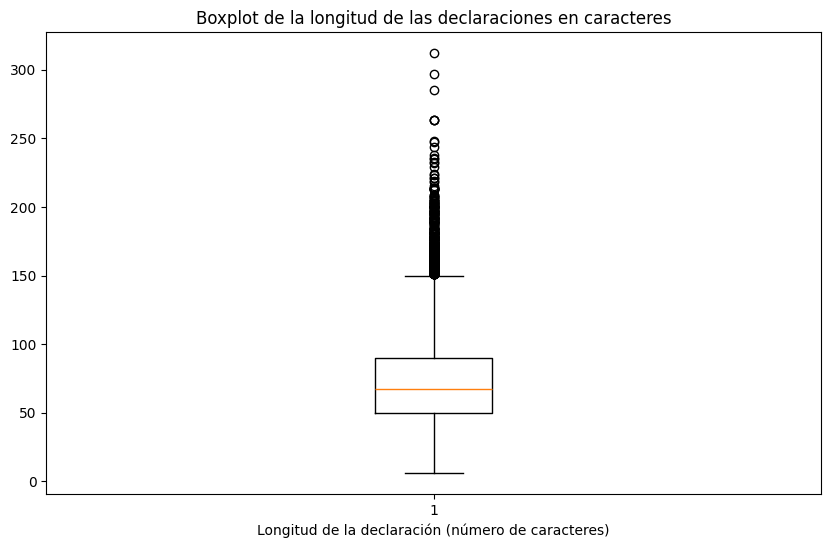

In [31]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_test['statement_len_words'], vert=True)
plt.xlabel('Longitud de la declaración (número de palabras)')
plt.title('Boxplot de la longitud de las declaraciones en palabras')
plt.grid(axis='x', alpha=0)
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(df_test['statement_len_chars'], vert=True)
plt.xlabel('Longitud de la declaración (número de caracteres)')
plt.title('Boxplot de la longitud de las declaraciones en caracteres')
plt.grid(axis='x', alpha=0)
plt.show()

Podemos observar que en cuanto a palabras el número de outliers es bastante más pequeño en comparación al del número de caracteres, aun así, hay bastantes outliers en ambas variables por lo que se va a modificar el proceso de preprocesado del texto para manejar menos cantidad de texto de los ejemplos ya que manejar expresiones tan largas podría disparar la dimensionalidad de los n-grams en TF-IDF o afectar el cómputo de kernels en SVM. 

Al tratarse de textos ya preprocesados, aunque existan algunos muy largos normalmente aportarán cierta información por lo que vamos a realizar la selección de un percentil poco agresivo como es el p98 en el caso de los titulares

In [51]:
w98 = int(df_test['statement_len_words'].quantile(0.98))
c98 = int(df_test['statement_len_chars'].quantile(0.98))

print(w98)
print(c98)

21
153


<h3>Columna speaker_description - Descripción del periodista</h3>

In [34]:
df_test = preprocess_data_legacy_pipeline.prepare_text_classic(df_test, ['speaker_description'])

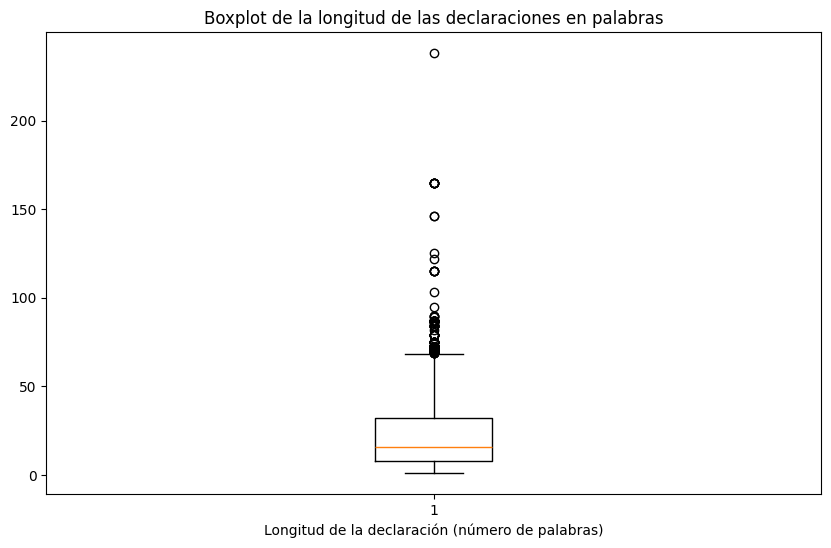

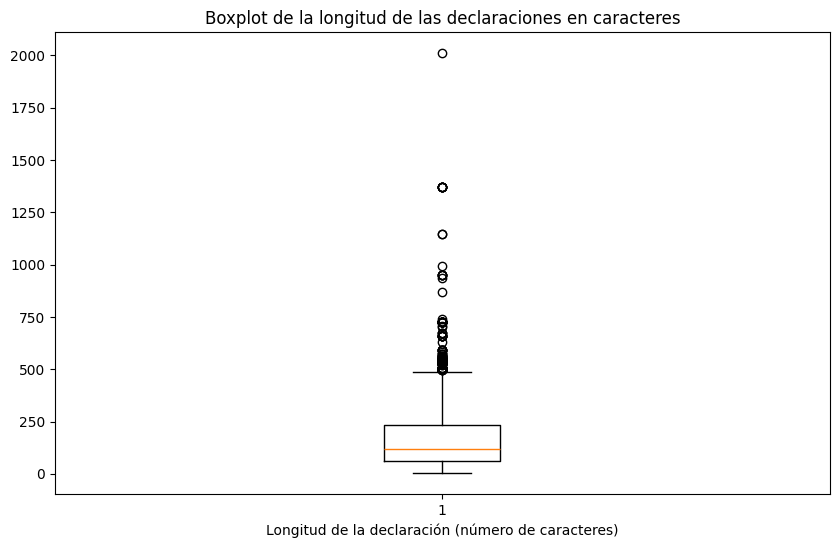

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_test['speaker_description_len_words'], vert=True)
plt.xlabel('Longitud de la descripción del periodista (número de palabras)')
plt.title('Boxplot de la longitud de la descripción del periodista en palabras')
plt.grid(axis='x', alpha=0)
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(df_test['speaker_description_len_chars'], vert=True)
plt.xlabel('Longitud de la descripción del periodista(número de caracteres)')
plt.title('Boxplot de la longitud de la descripción del periodista en caracteres')
plt.grid(axis='x', alpha=0)
plt.show()

En este caso también detectamos muchos outliers, pero se trata de un campo que normalmente aporta mucha información en textos más cortos al tratarse de una descripción sobre el redactor de una noticia. Por esto mismo, se va a elegir un percentil más bajo que en el statement, en este caso el p95.

In [43]:
w95 = int(df_test['speaker_description_len_words'].quantile(0.95))
c95 = int(df_test['speaker_description_len_chars'].quantile(0.95))

print(w95)
print(c95)

50
389


<h3>Columna justification - Justificación de la noticia</h3>

In [44]:
df_test = preprocess_data_legacy_pipeline.prepare_text_classic(df_test, ['justification'])

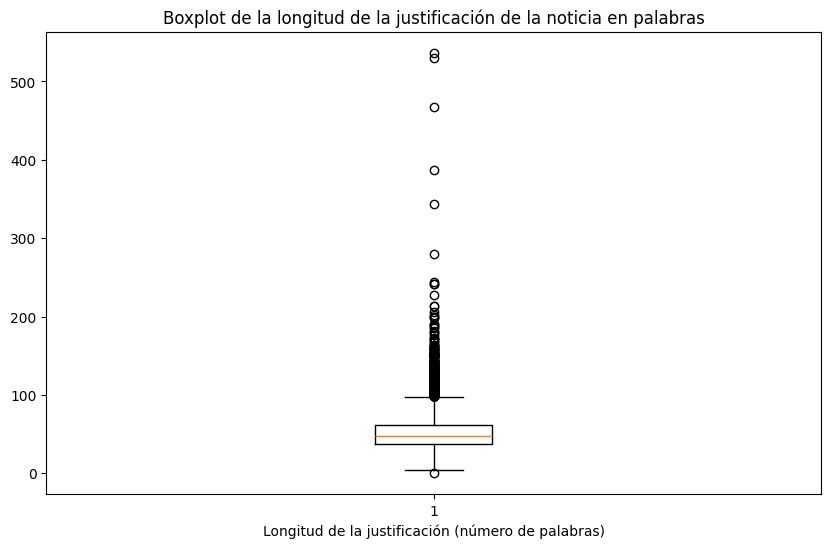

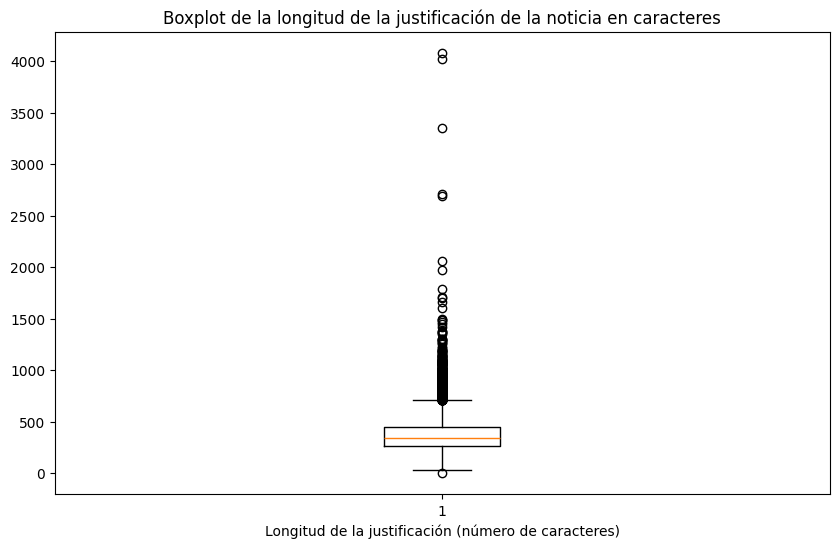

In [45]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_test['justification_len_words'], vert=True)
plt.xlabel('Longitud de la justificación (número de palabras)')
plt.title('Boxplot de la longitud de la justificación de la noticia en palabras')
plt.grid(axis='x', alpha=0)
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(df_test['justification_len_chars'], vert=True)
plt.xlabel('Longitud de la justificación (número de caracteres)')
plt.title('Boxplot de la longitud de la justificación de la noticia en caracteres')
plt.grid(axis='x', alpha=0)
plt.show()

In [49]:
w99 = int(df_test['justification_len_words'].quantile(0.99))
c99 = int(df_test['justification_len_chars'].quantile(0.99))

print(w99)
print(c99)

118
870


In [50]:
long_words = df_test[df_test['justification_len_words'] > w99]
long_chars = df_test[df_test['justification_len_chars'] > c99]

print("\nJustificaciones por encima de p99 (palabras):")
print(long_words[['clean_justification', 'justification_len_words']].head(10).to_string(index=False))

print("\nJustificaciones por encima de p99 (caracteres):")
print(long_chars[['clean_justification', 'justification_len_chars']].head(10).to_string(index=False))


Justificaciones por encima de p99 (palabras):
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

Visualizando estos ejemplos podemos ver que todavía hay justificaciones por encima del p99 que pueden llegar a aportar información sin ser excesivamente extensas por lo que se va a escoger un threshold de forma manual que en función de los resultados podrá ir variando.

En primer lugar se van a definir los siguientes umbrales:

- MAX_WORDS = 150
- MAX_CHARS = 1000

<h3>Columna subject - Tema de la noticia</h3>

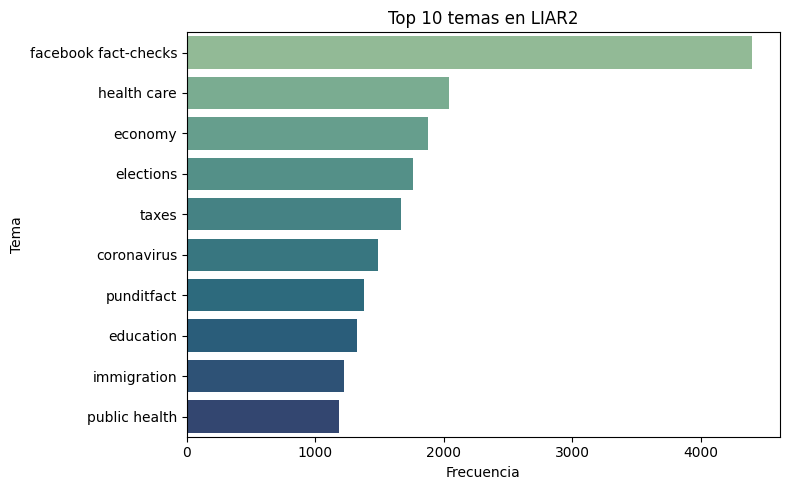

In [366]:
subs = df_test.assign(subject=df_test['subject'].str.split(';')).explode('subject')
top10 = subs['subject'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=top10.index, x=top10.values, hue=top10.index ,palette='crest', legend=False)
plt.title('Top 10 temas en LIAR2')
plt.xlabel('Frecuencia')
plt.ylabel('Tema')
plt.tight_layout()
plt.show()

También vamos a observar que temas tienen a estar más relacionados con noticias con menor o mayor veracidad, en este caso vamos a escoger los 10 temas más frecuentes en el conjunto de LIAR2

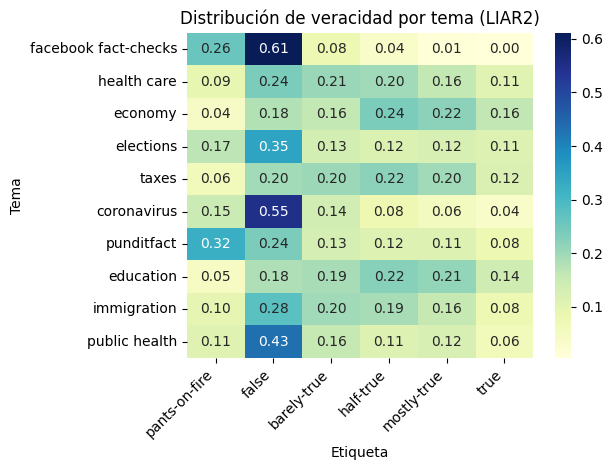

In [ ]:
df_expl = df_test.assign(subject=df_test['subject'].str.split(';')).explode('subject')

heat = pd.crosstab(df_expl['subject'], df_expl['label_name'], normalize='index')

ordered_labels = [
    'pants-on-fire',
    'false',
    'barely-true',
    'half-true',
    'mostly-true',
    'true'
]

heat = heat.reindex(columns=ordered_labels, fill_value=0)

top = df_expl['subject'].value_counts().head(10).index
heat = heat.loc[top]
sns.heatmap(heat, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Distribución de veracidad por tema (LIAR2)')
plt.ylabel('Tema')
plt.xlabel('Etiqueta')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Por otro lado, para saber si se podría convertir o no en categórica esta variable vamos a ver cuantos temas existen en el dataset

In [53]:
df_test['subject'].value_counts()

subject
facebook fact-checks                                    940
health care                                             600
elections                                               515
taxes                                                   482
education                                               421
                                                       ... 
city budget;city government;transportation;taxes          1
economy;population;poverty                                1
federal budget;crime;medicaid;medicare;welfare;taxes      1
ethics;human rights;military                              1
corrections and updates;poverty                           1
Name: count, Length: 7126, dtype: int64

Podemos observar como hay 7126 datos únicos en cuanto a temas. Esto no quiere decir que existan esta cantidad de temas ya que en muchos casos, aparecen varios temas por cada registro de los datos.

Al existir múltiples valores por registro la categorización de esta variable se vuelve más complicada ya que se perdería información valiosa sobre lo que trata la noticia.

Por otro lado, la cantidad de temas existentes hace que la creación de variables dummies pierda un poco el sentido.

Por todo esto, la variable subject se va a tratar como un texto libre en el que se concatenan los distintos temas mediante una delimitación entre ellos.

<h3>Columna speaker - Periodista que redactó la noticia o persona que hizo la declaración etc.</h3>

En primer lugar vamos a visualizar cuales son los 10 speakers con más noticias en nuestro conjunto de datos

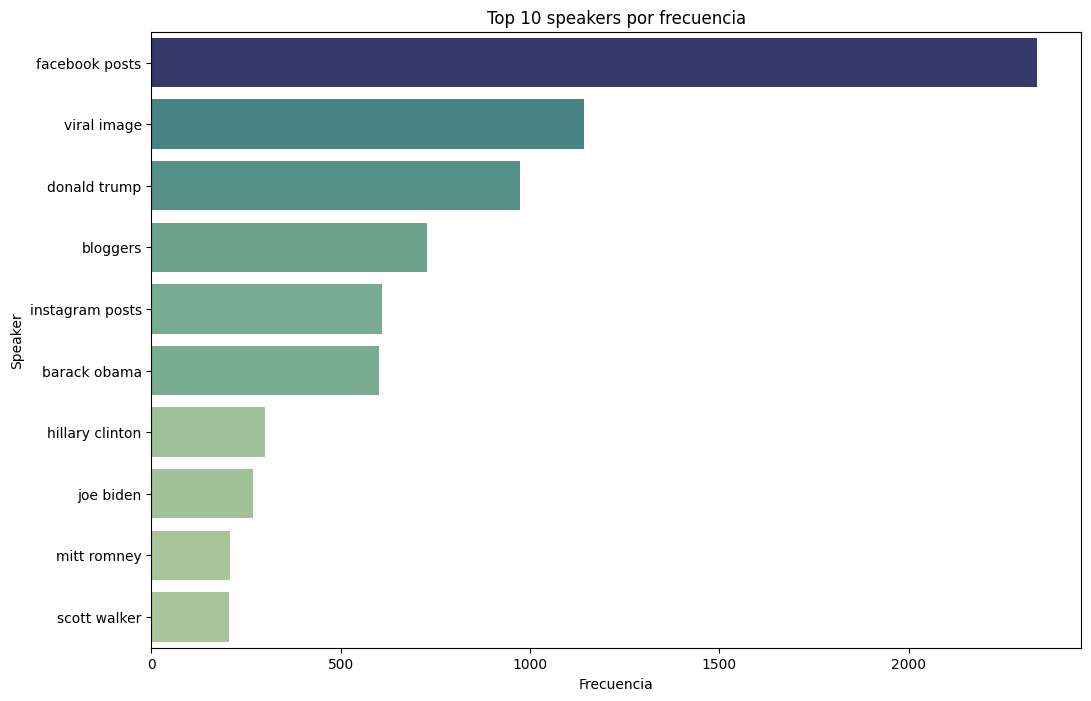

In [ ]:
top_n = 10
top_speakers = df_test["speaker"].value_counts().nlargest(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_speakers.values, y=top_speakers.index, hue=top_speakers.values, palette="crest", legend=False)
plt.title(f"Top {top_n} speakers por frecuencia")
plt.xlabel("Frecuencia")
plt.ylabel("Speaker")
plt.show()

También es importante conocer la veracidad de los speakers, por tanto visualizando la veracidad que tienen los 10 speakers con mayor frecuencia obtenemos...

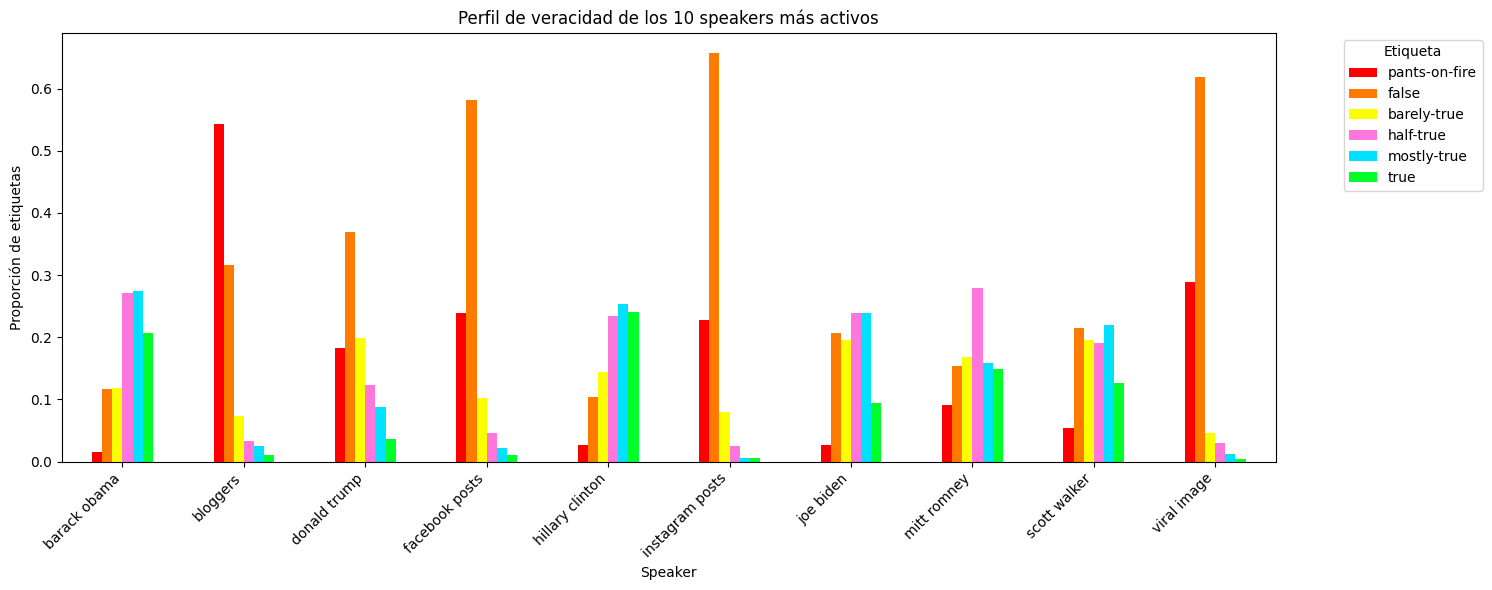

In [56]:
top_speakers_list = df_test['speaker'].value_counts().head(top_n).index
subset = df_test[df_test['speaker'].isin(top_speakers_list)]

ct = pd.crosstab(subset['speaker'], subset['label_name'], normalize='index')
ct = ct[['pants-on-fire','false','barely-true','half-true','mostly-true','true']]
ordered = ['pants-on-fire','false','barely-true','half-true','mostly-true','true']

color_map = {
    'pants-on-fire': "#ff0000",
    'false':         "#ff7b00",
    'barely-true':   "#fbff00",
    'half-true':     "#ff77dd",
    'mostly-true':   "#00e1ff",
    'true':          "#00ff2a"
}

colors = [color_map[label] for label in ordered]

ct = ct.reindex(columns=ordered, fill_value=0)

# Hacemos el bar plot apilado indicando la lista `colors`
ax = ct.plot(
    kind='bar',
    stacked=False,
    figsize=(15,6),
    color=colors    # <-- aquí va tu lista de colores
)

ax.set_title('Perfil de veracidad de los 10 speakers más activos')
ax.set_xlabel('Speaker')
ax.set_ylabel('Proporción de etiquetas')
ax.legend(title='Etiqueta', bbox_to_anchor=(1.05,1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Como conclusión podemos ver que en nuestro conjunto de datos las redes sociales forman una de las fuentes de desinformación principales

Otro apunte importante acerca de los speakers es que no aportan información directa al modelo por lo que esta variable se va a utilizar únicamente en la visualización y el análisis de los datos

<h3>Columnas count</h3>

En cuanto a las columnas que nos proporcionan el número de noticias de cada etiqueta que ha realizado cada speaker, vamos a visualizar cómo se distribuyen los valores de una variable (en este caso cada recuento histórico) a lo largo de su rango posible

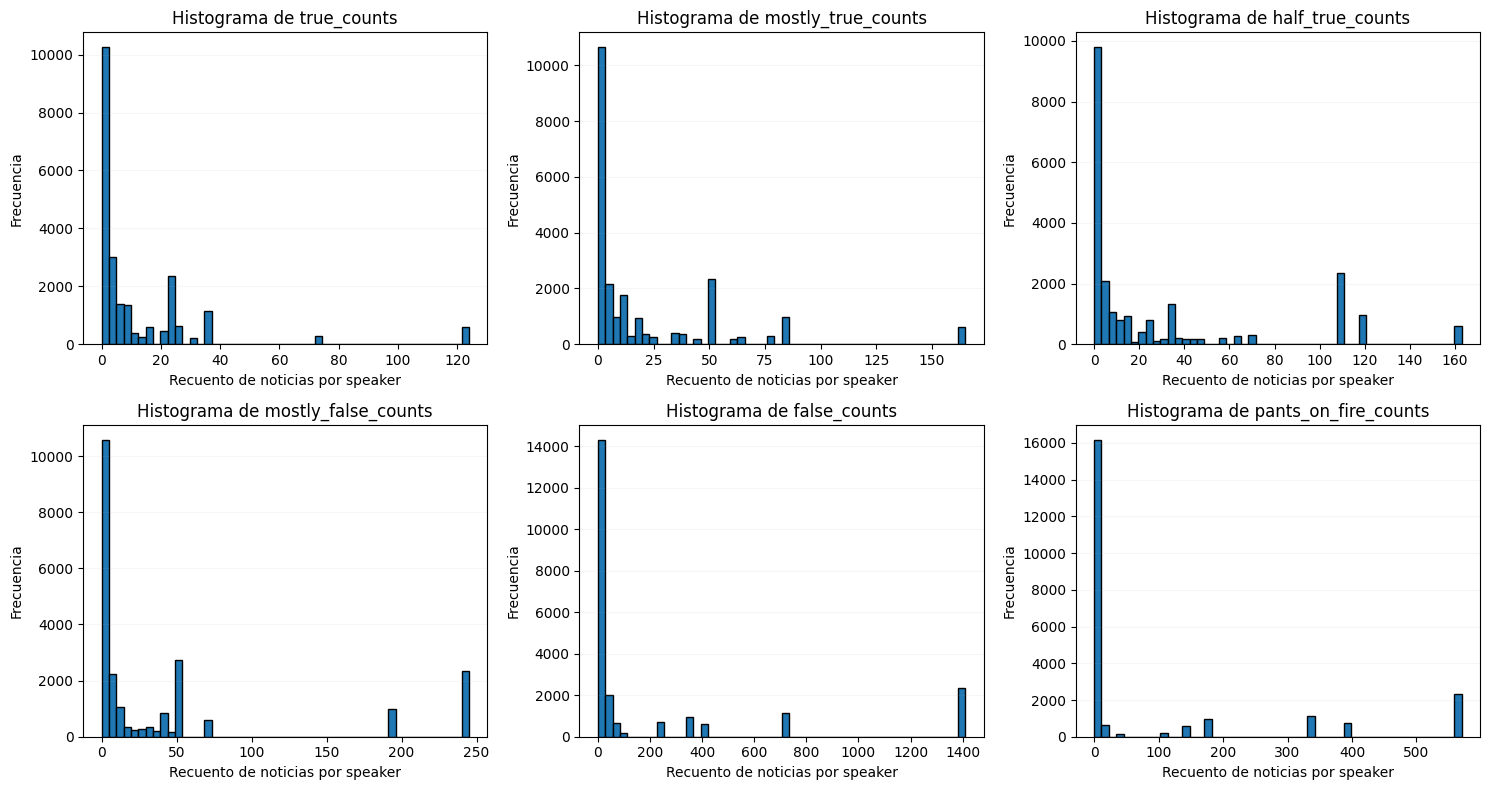

In [61]:
count_vars = [
    'true_counts',
    'mostly_true_counts',
    'half_true_counts',
    'mostly_false_counts',
    'false_counts',
    'pants_on_fire_counts'
]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for ax, var in zip(axes, count_vars):
    ax.hist(df_test[var], bins=50, log=False, edgecolor='k')
    ax.set_title(f'Histograma de {var}')
    ax.set_xlabel('Recuento de noticias por speaker')
    ax.set_ylabel('Frecuencia')
    ax.grid(axis='y', alpha=0.1)

plt.tight_layout()
plt.show()

En conjunto, estos histogramas confirman que los recuentos de verificaciones por orador son muy desiguales, con muchos oradores eventuales y unos pocos extremadamente frecuentes, por lo que es esencial aplicar algún tipo de transformación antes de incorporarlos al modelo.

En este caso, la transformación que se va a realizar sobre los datos consiste en el cálculo total de noticias por orador y la transformación de los valores númericos a proporciones. Con esto conseguiremos normalizar la reputación de los distintos oradores

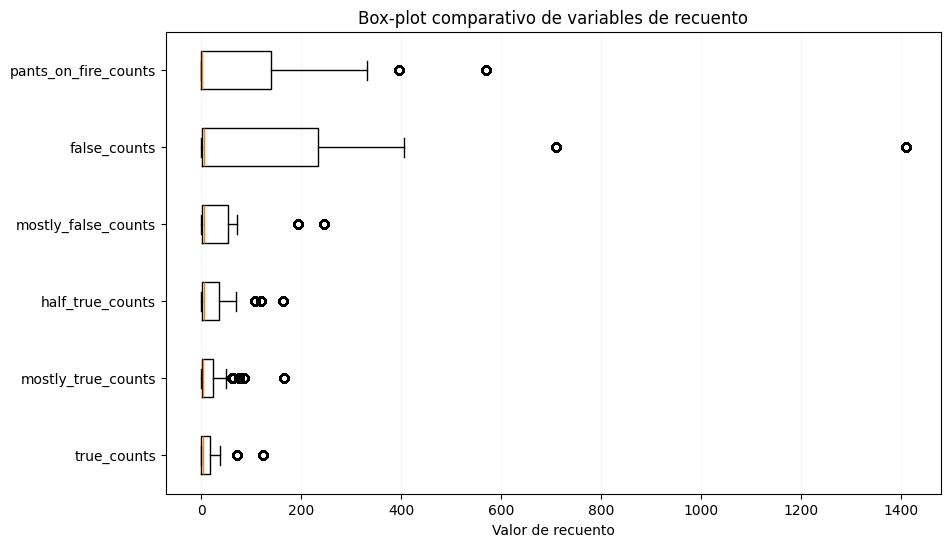

In [67]:
plt.figure(figsize=(10, 6))
plt.boxplot([df_test[v] for v in count_vars], vert=False)
plt.yticks(range(1, len(count_vars) + 1), count_vars)
plt.xlabel('Valor de recuento')
plt.title('Box‐plot comparativo de variables de recuento')
plt.grid(axis='x', alpha=0.1)
plt.show()

Este gráfico confirma que hay un fuerte sesgo positivo y gran variabilidad en las etiquetas negativas (“false”, “pants-on-fire”), mientras que los recuentos de las categorías más verdaderas se concentran en valores bajos.

<h3>Columna context - Contexto de la afirmación</h3>

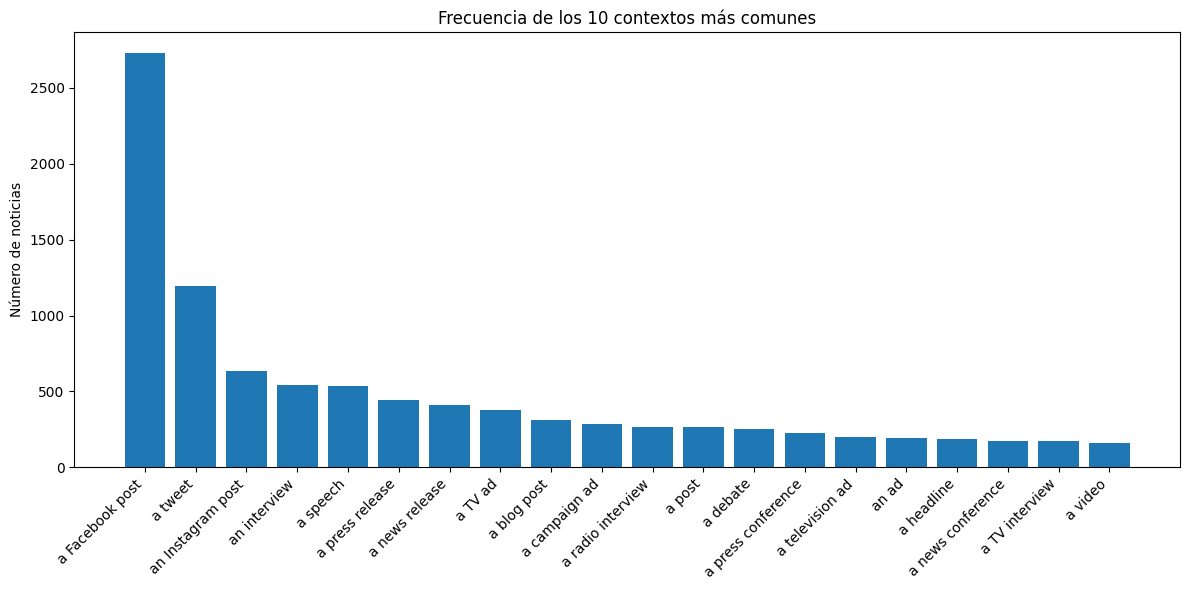

In [ ]:
context_counts = df_test['context'].value_counts().head(20)

plt.figure(figsize=(12, 6))
plt.bar(context_counts.index, context_counts.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Número de noticias')
plt.title('Frecuencia de los 20 contextos más comunes')
plt.tight_layout()
plt.show()

<Figure size 1200x500 with 0 Axes>

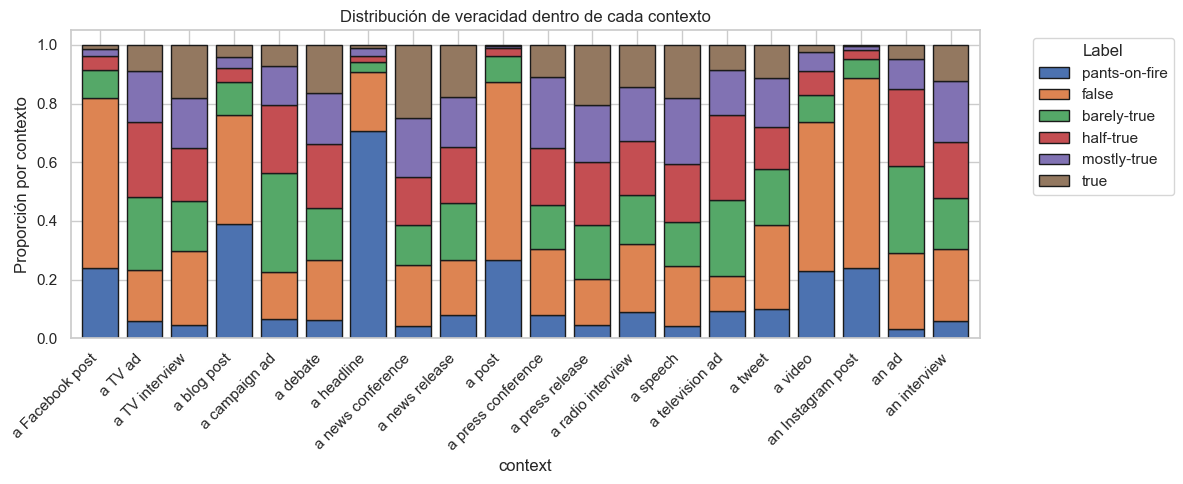

In [78]:
top_contexts = df_test['context'].value_counts().nlargest(20).index
df_top = df_test[df_test['context'].isin(top_contexts)].copy()

ct = pd.crosstab(df_top['context'], df_top['label_name'])
ct_norm = ct.div(ct.sum(axis=1), axis=0)

label_order = [
    'pants-on-fire',
    'false',
    'barely-true',
    'half-true',
    'mostly-true',
    'true'
]

ct_norm = ct_norm[label_order]

plt.figure(figsize=(12,5))
ct_norm.plot(kind='bar', 
             stacked=True, 
             edgecolor='k',
             figsize=(12,5), 
             width=0.8)
plt.legend(title='Label', bbox_to_anchor=(1.05,1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proporción por contexto')
plt.title('Distribución de veracidad dentro de cada contexto')
plt.tight_layout()
plt.show()

In [73]:
df_test['context'].value_counts()

context
a Facebook post                                                            2730
a tweet                                                                    1196
an Instagram post                                                           631
an interview                                                                541
a speech                                                                    533
                                                                           ... 
a roundtable discussion on ABC’s "This Week with George Stephanopoulos"       1
remarks by chief strategist Steve Schmidt                                     1
a column on Blue Jersey                                                       1
the Fox & Friends show                                                        1
an interview on "60 Minutes"                                                  1
Name: count, Length: 5529, dtype: int64

Podemos observar que muchos de los registros podrían estar agrupados en categorías más concretas por lo que de forma manual se van a generar distintas categorías para estos datos.

Es decir, el tratamiento de esta variable va a ser el de una variable categórica con su consecuente creación de dummies.

Tras visualizar los datos, se han creado las siguientes categorías para realizar agrupaciones de los mismos:

- Social_media
- Advertising
- Verbal_event     
- Document     
- Media        
- Location   

In [79]:
df_test = preprocess_data_legacy_pipeline.prepare_context_generic(df_test)

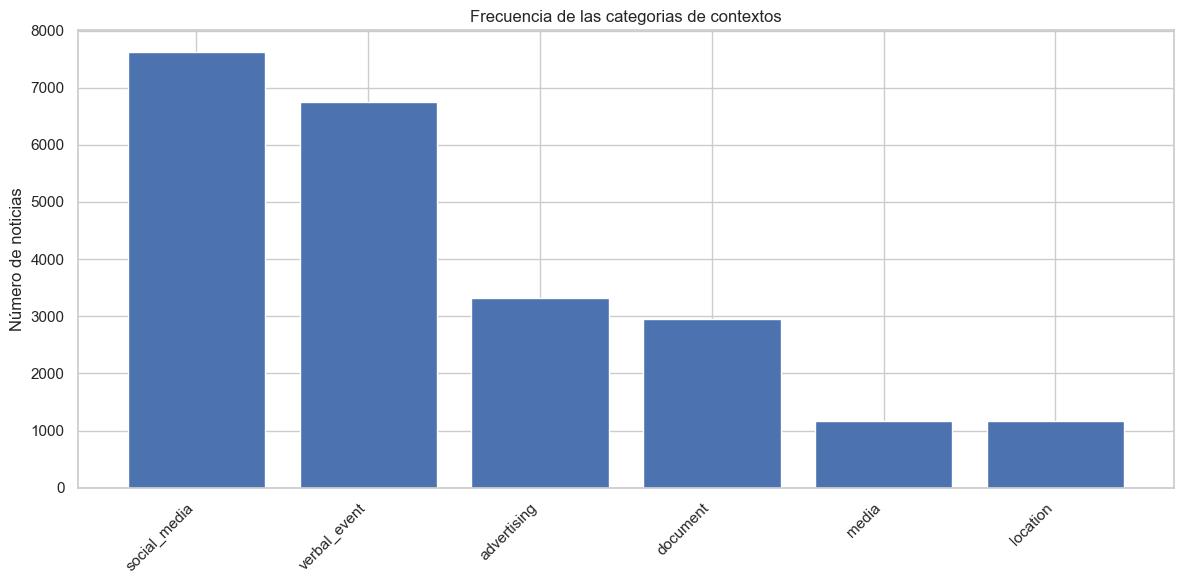

In [84]:
context_counts = df_test['context_cat'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(context_counts.index, context_counts.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Número de noticias')
plt.title('Frecuencia de las categorias de contextos')
plt.tight_layout()
plt.show()

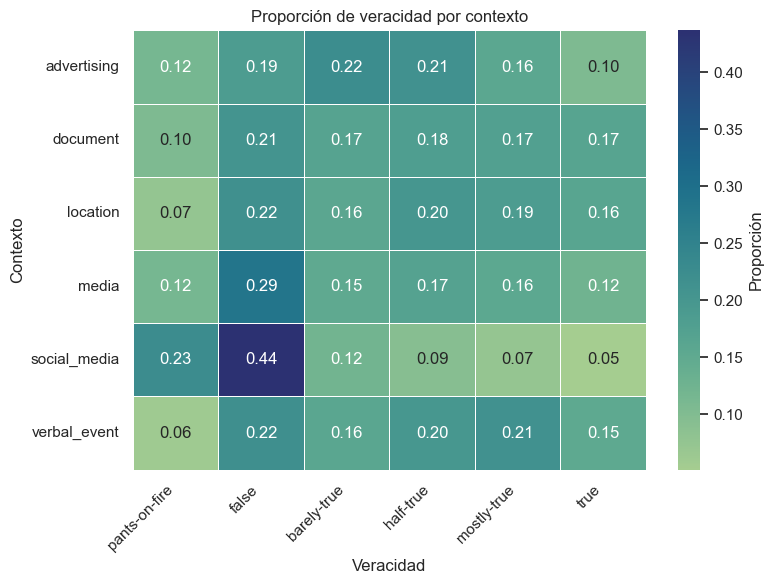

In [90]:
top_contexts = df_test['context_cat'].value_counts().nlargest(10).index
df_top = df_test[df_test['context_cat'].isin(top_contexts)]

ct = pd.crosstab(df_top['context_cat'], df_top['label_name'], normalize='index')

label_order = ['pants-on-fire',
    'false',
    'barely-true',
    'half-true',
    'mostly-true',
    'true']
ct = ct[label_order]

# 5) Dibuja el heatmap
sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(
    ct,
    annot=True,
    fmt=".2f",
    cmap="crest",
    cbar_kws={'label': 'Proporción'},
    linewidths=0.5
)
plt.title('Proporción de veracidad por contexto')
plt.ylabel('Contexto')
plt.xlabel('Veracidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [131]:
df_liar.loc[df_liar['date']=='December 7, 2011']

,id,label,statement,date,subject,speaker,speaker_description,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
3969,4700,5,"The national debt increased $16,000 every seco...","December 7, 2011",deficit;federal budget,tim kaine,Tim Kaine is a U.S. senator representing Virgi...,14,17,15,8,4,0,a debate,Our conclusion: Kaine says the national debt i...
4407,4708,1,"Our ""kids can't openly celebrate Christmas or ...","December 7, 2011",education;message machine 2012;religion,rick perry,Rick Perry is the U.S. Energy Secretary and wa...,26,24,43,30,31,18,an Iowa TV ad,"So, can kids pray and openly celebrate Christm..."
7215,4780,5,I was one of about a dozen (senators) who vote...,"December 7, 2011",federal budget,george allen,George Allen was a U.S. senator from 2001-2007...,8,4,3,2,8,1,a debate,"After the amendment’s defeat, lawmakers hashin..."
13884,4752,1,"George Allen cast ""the deciding vote"" for the ...","December 7, 2011",voting record;taxes,tim kaine,Tim Kaine is a U.S. senator representing Virgi...,14,17,15,8,4,0,a debate,Fans would marvel at how Jones’ shot won the g...
15696,5575,3,George Allen and his colleagues in the Senate ...,"December 7, 2011",corrections and updates;deficit,tim kaine,Tim Kaine is a U.S. senator representing Virgi...,14,17,15,8,4,0,a debate,
17696,4720,1,Our federal government has lent $2 billion to ...,"December 7, 2011",energy;foreign policy;trade,george allen,George Allen was a U.S. senator from 2001-2007...,8,4,3,2,8,1,a debate,He is referring to a preliminary agreement by ...
18499,4732,2,Speaker Gingrich has said that we ought to get...,"December 7, 2011",education;labor;poverty,mitt romney,Mitt Romney is a U.S. senator from Utah. He ra...,31,33,58,35,32,19,an interview on Fox News,"Romney said, ""Speaker Gingrich has said that w..."
19056,4725,5,Richard Cordray's nomination to head the Consu...,"December 7, 2011",consumer safety;financial regulation;governmen...,sherrod brown,Sherrod Brown is a Democratic U.S. Senator rep...,15,9,6,4,4,1,a Senate banking subcommittee hearing,"Lacking a majority, they failed to win those c..."
19840,4699,5,"The United States ""is number one in the world ...","December 7, 2011",energy,george allen,George Allen was a U.S. senator from 2001-2007...,8,4,3,2,8,1,a debate,"Russia has tried to stake some claims, but Can..."
